# VAR model

In [40]:
#importing libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import rmse, mse, meanabs
from sklearn.model_selection import TimeSeriesSplit
import time
from matplotlib import rcParams
import datetime

import requests 

import warnings
warnings.filterwarnings("ignore")

In [41]:
#default plot size
rcParams['figure.figsize'] = 6,6

In [42]:
#Importing data from EIA(Energy Information Administration)
oil_df = pd.read_csv('D:\myDocuments\oil project\dfoil.csv', index_col=0,parse_dates=True)
oil_df_transformed = pd.read_csv('D:\myDocuments\oil project\dfoil_transformed.csv', index_col=0,parse_dates=True)

In [43]:
#overviewing dataframes
display(oil_df.head(5))
display(oil_df_transformed.head(5))

,oilrig_count,oil_price,oilconsumption,oilproduction,oilstorage
1997-01-07,344.709677,26.250000,17352.142857,6479.714286,837012.285714
1997-01-08,345.161290,26.550000,17596.428571,6486.142857,837598.857143
1997-01-09,345.612903,26.300000,17840.714286,6492.571429,838185.428571
1997-01-10,346.064516,26.150000,18085.000000,6499.000000,838772.000000
1997-01-11,346.516129,25.833333,18160.571429,6495.714286,838473.000000


,oilrig_count,oil_price,oilconsumption,oilproduction,oilstorage
1997-01-09,0.903226,0.050000,488.571429,12.857143,1173.142857
1997-01-10,0.903226,-0.400000,488.571429,12.857143,1173.142857
1997-01-11,0.903226,-0.466667,319.857143,3.142857,287.571429
1997-01-12,0.903226,-0.633333,151.142857,-6.571429,-598.000000
1997-01-13,0.903226,-0.633333,151.142857,-6.571429,-598.000000


,gasrig_count,gas_price,gaswell_count,gasimports_amount,gasconsumption_amount
1997-01-07,480.709677,3.820000,871.774194,270.982903,2488.713903
1997-01-08,481.161290,3.800000,870.903226,269.765387,2480.109387
1997-01-09,481.612903,3.610000,870.032258,268.547871,2471.504871
1997-01-10,482.064516,3.920000,869.161290,267.330355,2462.900355
1997-01-11,482.516129,3.946667,868.290323,266.112839,2454.295839


,gasrig_count,gas_price,gaswell_count,gasimports_amount,gasconsumption_amount
1997-01-09,0.903226,-0.210000,-1.741935,-2.435032,-17.209032
1997-01-10,0.903226,0.120000,-1.741935,-2.435032,-17.209032
1997-01-11,0.903226,0.336667,-1.741935,-2.435032,-17.209032
1997-01-12,0.903226,0.053333,-1.741935,-2.435032,-17.209032
1997-01-13,0.903226,0.053333,-1.741935,-2.435032,-17.209032


OIL RIGS PREDICTION

In [44]:
freq_time = 'M'
oil_df = oil_df.resample('M').mean()
oil_df.index.freq = 'M'
oil_df_transformed = oil_df_transformed.resample('M').mean()
oil_df_transformed.index.freq = 'M'
gas_df = gas_df.resample('M').mean()
gas_df.index.freq = 'M'
gas_df_transformed = gas_df_transformed.resample('M').mean()
gas_df_transformed.index.freq = 'M'

Splitting the data into train and test data set.

In [46]:
#period is the variable that will be used to determine the number of months(steps) to predict.
period = 12
train, test = oil_df_transformed[0:-period], oil_df_transformed[-period:]

Training VAR model

In [26]:
oil_model = VAR(train)

In [47]:
for i in range(10):
    oil_results = oil_model.fit(i,trend='ctt')
    print('Order =', i)
    print('AIC: ', oil_results.aic)
    print('BIC: ', oil_results.bic)

Order = 0
AIC:  25.85377895509131
BIC:  26.04552677733711
Order = 1
AIC:  24.62562748700883
BIC:  25.138257547397412
Order = 2
AIC:  24.543052490949254
BIC:  25.37820504545798
Order = 3
AIC:  24.49046824264916
BIC:  25.649797644726515
Order = 4
AIC:  24.44370500807985
BIC:  25.928879877434046
Order = 5
AIC:  24.479851862504358
BIC:  26.292555256478465
Order = 6
AIC:  24.510402378822327
BIC:  26.65233196640421
Order = 7
AIC:  24.560680628038043
BIC:  27.033548866554383
Order = 8
AIC:  24.662155460325025
BIC:  27.467689774869942
Order = 9
AIC:  24.57837342485318
BIC:  27.71831639050286


In [48]:
oil_results = oil_model.fit(4,trend='ctt')
oil_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Nov, 2022
Time:                     01:26:30
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    25.9289
Nobs:                     282.000    HQIC:                   25.0393
Log likelihood:          -5332.27    FPE:                4.13575e+10
AIC:                      24.4437    Det(Omega_mle):     2.79448e+10
--------------------------------------------------------------------
Results for equation oilrig_count
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.387508         0.281652           -1.376           0.169
trend                     0.007407         0.004572            1.620           0.105
trend**2                 -0.000025   

In [49]:
lag_order = oil_results.k_ar
lag_order

4

Sample Forecasting against known value

<AxesSubplot: title={'center': 'Oil Rig Count Prediction: FORECAST vs TEST Set - VAR Model'}>

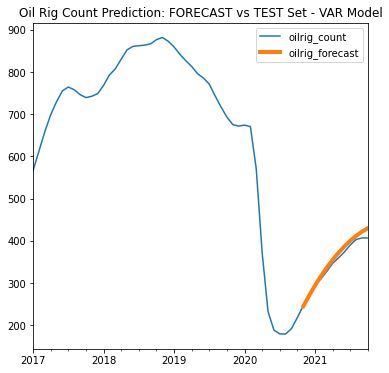

In [50]:
z = oil_results.forecast(y=train.values[-lag_order:], steps=period)

idx = pd.date_range(test.index.min(), periods=period, freq='M')
oil_forecast = pd.DataFrame(z, index=idx, columns=['oilrig_count2d', 'oil_price2d', 'oilconsumption2d', 'oilproduction2d',
       'oilstorage2d'])

oil_forecast['oilrig_count1d'] = (oil_df['oilrig_count'].iloc[-period-1]-oil_df['oilrig_count'].iloc[-period-2])+oil_forecast['oilrig_count2d'].cumsum()
oil_forecast['oilrig_forecast'] = oil_df['oilrig_count'].iloc[-period-1] + oil_forecast['oilrig_count1d'].cumsum()

oil_df['oilrig_count'].loc['2017':].plot(legend=True)
oil_forecast['oilrig_forecast'].plot(legend=True,linewidth=4,title='Oil Rig Count Prediction: FORECAST vs TEST Set - VAR Model')

Evaluating Model Performance

In [51]:
RMSE1 = rmse(oil_df['oilrig_count'].loc[test.index.min():],oil_forecast['oilrig_forecast'])
MSE1 = mse(oil_df['oilrig_count'].loc[test.index.min():],oil_forecast['oilrig_forecast'])
MAE1 = meanabs(oil_df['oilrig_count'].loc[test.index.min():],oil_forecast['oilrig_forecast'])

print(f"""Oil Rig VAR(4) RMSE: {RMSE1:.3f}
Oil Rig VAR(4) MSE: {MSE1:.3f}
Oil Rig VAR(4) MAE: {MAE1:.3f}\n
Oil Rig Mean Value: {oil_df['oilrig_count'][-period:].mean():.3f}
Oil Rig std Value: {oil_df['oilrig_count'][-period:].std():.3f}
Oil Rig Percent Change: {RMSE1/oil_df['oilrig_count'][-period:].mean()*100:.3f}%""")

Oil Rig VAR(4) RMSE: 11.013
Oil Rig VAR(4) MSE: 121.297
Oil Rig VAR(4) MAE: 9.293

Oil Rig Mean Value: 345.055
Oil Rig std Value: 54.791
Oil Rig Percent Change: 3.192%


In [55]:
tscv = TimeSeriesSplit(n_splits=10, test_size=12)
RMSE_oil = []
MSE_oil = []
MAE_oil = []
for train_index, test_index in tscv.split(oil_df_transformed):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    train,test = oil_df_transformed.loc[oil_df_transformed.index[train_index],:], oil_df_transformed.loc[oil_df_transformed.index[test_index],:]
    oil_model = VAR(train)
    oil_results = oil_model.fit(4,trend='ctt')
    z = oil_results.forecast(y=train.values[-lag_order:], steps=period)
    idx = pd.date_range(test.index.min(), periods=period, freq='M')
    oil_df_forecast = pd.DataFrame(z, index=idx, columns=['oilrig_count2d', 'oil_price2d', 'oilconsumption2d', 'oilproduction2d',
           'oilstorage2d'])
    oil_df_forecast['oilrig_count1d'] = (oil_df['oilrig_count'].iloc[-period-1]-oil_df['oilrig_count'].iloc[-period-2])+oil_df_forecast['oilrig_count2d'].cumsum()
    oil_df_forecast['oilrig_forecast'] = oil_df['oilrig_count'].iloc[-period-1] + oil_df_forecast['oilrig_count1d'].cumsum()
    RMSE_oil.append('{:.3f}'.format(rmse(oil_df.loc[oil_df.index[test_index],'oilrig_count'],oil_df_forecast['oilrig_forecast'])))
    MSE_oil.append('{:.3f}'.format(mse(oil_df.loc[oil_df.index[test_index],'oilrig_count'],oil_df_forecast['oilrig_forecast'])))
    MAE_oil.append('{:.3f}'.format(meanabs(oil_df.loc[oil_df.index[test_index],'oilrig_count'],oil_df_forecast['oilrig_forecast'])))

RMSE_oil = np.array(RMSE_oil).astype('float')
MSE_oil = np.array(MSE_oil).astype('float')
MAE_oil = np.array(MAE_oil).astype('float')
print(f"""\n10-fold Cross Validation Oil Rig
RMSE: {RMSE_oil.mean():.3f},
MSE: {MSE_oil.mean():.3f}
MAE: {MAE_oil.mean():.3f}\n
Oil Rig Mean Value: {oil_df['oilrig_count'][-period:].mean():.3f}
Oil Rig std Value: {oil_df['oilrig_count'][-period:].std():.3f}
Oil Rig Percent Change: {RMSE_oil.mean()/oil_df['oilrig_count'][-period:].mean()*100:.3f}%""")

TRAIN: 178 TEST: 12
TRAIN: 190 TEST: 12
TRAIN: 202 TEST: 12
TRAIN: 214 TEST: 12
TRAIN: 226 TEST: 12
TRAIN: 238 TEST: 12
TRAIN: 250 TEST: 12
TRAIN: 262 TEST: 12
TRAIN: 274 TEST: 12
TRAIN: 286 TEST: 12

10-fold Cross Validation Oil Rig
RMSE: 515.152,
MSE: 382589.856
MAE: 488.906

Oil Rig Mean Value: 345.055
Oil Rig std Value: 54.791
Oil Rig Percent Change: 149.296%


After Evaluation, Fitting Model with 100% data for Real Future Prediction

In [57]:
startperiod = time.time()
oil_model = VAR(oil_df_transformed)
oil_results = oil_model.fit(4,trend='ctt')
z = oil_results.forecast(y=oil_df_transformed.values, steps=period)
idx = pd.date_range(oil_df_transformed.index.max(), periods=period, freq='M')
oil_df_forecast = pd.DataFrame(z, index=idx, columns=['oilrig_count2d', 'oil_price2d', 'oilconsumption2d', 'oilproduction2d',
       'oilstorage2d'])
oil_df_forecast['oilrig_count1d'] = (oil_df['oilrig_count'].iloc[-1]-oil_df['oilrig_count'].iloc[-2])+oil_df_forecast['oilrig_count2d'].cumsum()
oil_df_forecast['oilrig_forecast'] = oil_df['oilrig_count'].iloc[-1] + oil_df_forecast['oilrig_count1d'].cumsum()
executionperiod = (time.time() - startperiod)
print('Execution period in seconds: ' + str(executionperiod))

Execution period in seconds: 0.02294135093688965


<AxesSubplot: title={'center': 'Oil Rig Count Prediction: REAL FORECAST - VAR Model'}>

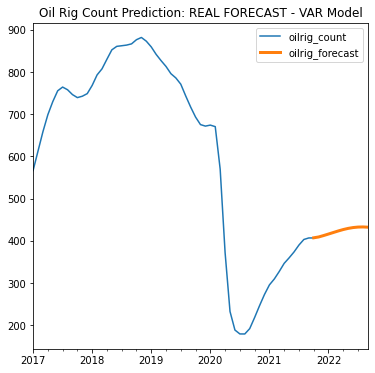

In [59]:
oil_df['oilrig_count'].loc['2017':].plot(legend=True)
oil_df_forecast['oilrig_forecast'].plot(legend=True,linewidth=3,title='Oil Rig Count Prediction: REAL FORECAST - VAR Model')